In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [2]:
data = pd.read_csv(r'D:\\IntrainTech\\heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,Income,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Country,Continent,Hemisphere,Heart_Attack_Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood_Pressure', 'Heart_Rate', 'Diabetes', 'Family_History', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week', 'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level', 'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides', 'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 'Country', 'Continent', 'Hemisphere', 'Heart_Attack_Risk'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood_Pressure                   8763 non-null   object 
 5   Heart_Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family_History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol_Consumption              8763 non-null   int64  
 11  Exercise_Hours_Per_Week          8763 non-null   float64
 12  Diet                

In [5]:
print(f'Shape     : {data.shape}\n'
      f'Size      : {data.size}\n'
      f'Dimension : {data.ndim}')

Shape     : (8763, 26)
Size      : 227838
Dimension : 2


In [6]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood_Pressure                     0
Heart_Rate                         0
Diabetes                           0
Family_History                     0
Smoking                            0
Obesity                            0
Alcohol_Consumption                0
Exercise_Hours_Per_Week            0
Diet                               0
Previous_Heart_Problems            0
Medication_Use                     0
Stress_Level                       0
Sedentary_Hours_Per_Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical_Activity_Days_Per_Week    0
Sleep_Hours_Per_Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart_Attack_Risk                  0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.00,53.71,21.25,18.00,35.00,54.00,72.00,90.00
Cholesterol,8763.00,259.88,80.86,120.00,192.00,259.00,330.00,400.00
Heart_Rate,8763.00,75.02,20.55,40.00,57.00,75.00,93.00,110.00
Diabetes,8763.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Family_History,8763.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Smoking,8763.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Obesity,8763.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Alcohol_Consumption,8763.00,0.60,0.49,0.00,0.00,1.00,1.00,1.00
Exercise_Hours_Per_Week,8763.00,10.01,5.78,0.00,4.98,10.07,15.05,20.00
Previous_Heart_Problems,8763.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


In [9]:
data.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood_Pressure                     3915
Heart_Rate                           71
Diabetes                              2
Family_History                        2
Smoking                               2
Obesity                               2
Alcohol_Consumption                   2
Exercise_Hours_Per_Week            8763
Diet                                  3
Previous_Heart_Problems               2
Medication_Use                        2
Stress_Level                         10
Sedentary_Hours_Per_Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical_Activity_Days_Per_Week       8
Sleep_Hours_Per_Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [10]:
data = data.drop('Patient ID', axis=1)
data.head()

,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,Income,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Country,Continent,Hemisphere,Heart_Attack_Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [11]:
data['BP_systolic'] = data['Blood_Pressure'].apply(lambda x: x.split("/")[0])
data['BP_diastolic'] = data['Blood_Pressure'].apply(lambda x: x.split("/")[1])

In [12]:
data = data[['Age', 'Sex', 'Cholesterol', 
#          'Blood Pressure',
          'BP_systolic', 'BP_diastolic',
         'Heart_Rate', 'Diabetes',
       'Family_History', 'Smoking', 'Obesity', 'Alcohol_Consumption',
       'Exercise_Hours_Per_Week', 'Diet', 'Previous_Heart_Problems',
       'Medication_Use', 'Stress_Level', 'Sedentary_Hours_Per_Day', 'Income',
       'BMI', 'Triglycerides', 'Physical_Activity_Days_Per_Week',
       'Sleep_Hours_Per_Day', 'Country', 'Continent', 'Hemisphere',
       'Heart_Attack_Risk']]


data['BP_systolic'] = pd.to_numeric(data['BP_systolic'])
data['BP_diastolic'] = pd.to_numeric(data['BP_diastolic'])

In [13]:
df2 = data

df2 = df2[['Age', 'Sex', 'Cholesterol','BP_systolic', 'BP_diastolic',
         'Heart_Rate', 'Diabetes','Family_History', 'Smoking', 'Obesity',
         'Alcohol_Consumption','Exercise_Hours_Per_Week', 'Diet',
         'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level', 
         'Sedentary_Hours_Per_Day', 'Income','BMI', 'Triglycerides', 
         'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 
#         'Country', 'Continent', 'Hemisphere',
       'Heart_Attack_Risk']]

In [14]:
cat_cols = ['Sex','Diabetes','Family_History','Smoking','Obesity','Alcohol_Consumption','Diet','Previous_Heart_Problems','Medication_Use','Stress_Level','Physical_Activity_Days_Per_Week','Sleep_Hours_Per_Day','Country','Continent','Hemisphere','Heart_Attack_Risk']
num_cols = []
for i in data.columns:
    if i not in cat_cols:
        num_cols.append(i)
num_cols

['Age',
 'Cholesterol',
 'BP_systolic',
 'BP_diastolic',
 'Heart_Rate',
 'Exercise_Hours_Per_Week',
 'Sedentary_Hours_Per_Day',
 'Income',
 'BMI',
 'Triglycerides']

Data Visualization

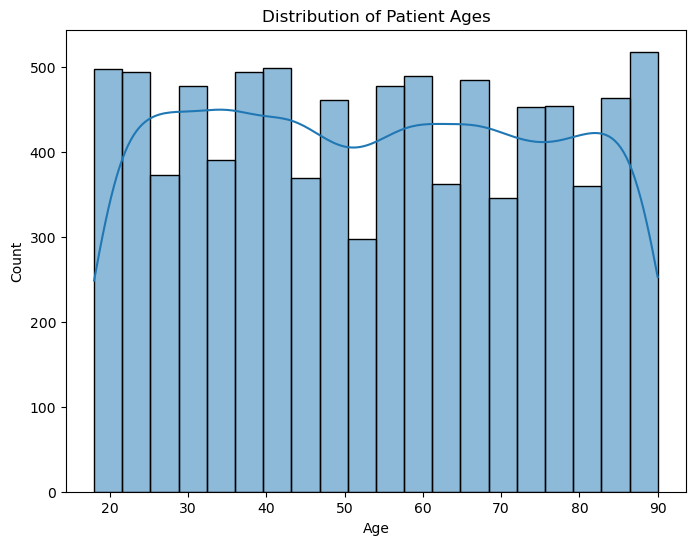

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

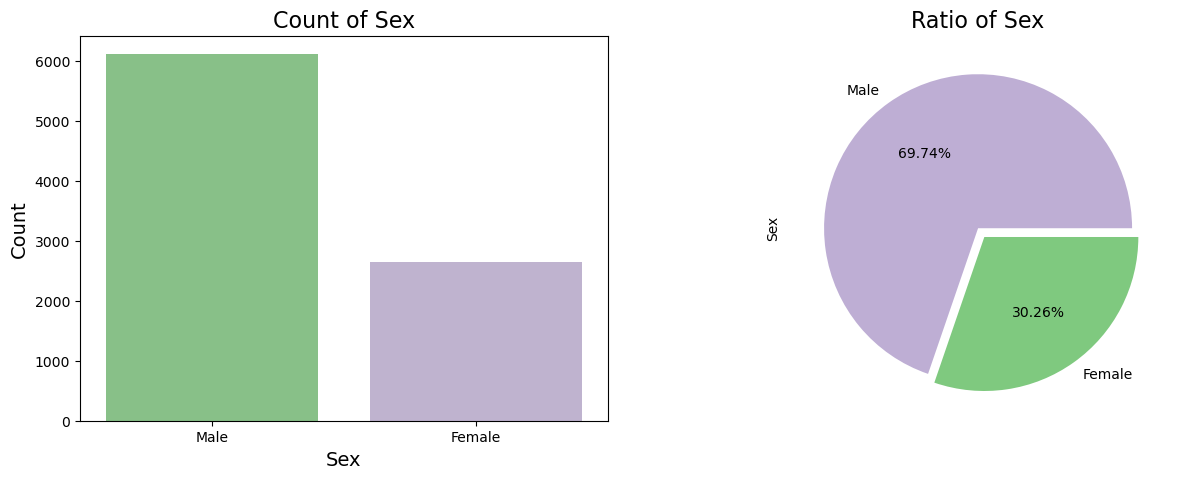

In [16]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=data,
                   x=data['Sex'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Sex", fontsize=16)

ax2 = data['Sex'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');
axs[1].set_title("Ratio of Sex", fontsize=16);

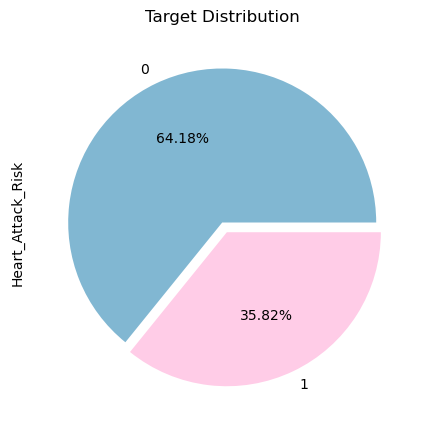

In [17]:
ax = data['Heart_Attack_Risk'].value_counts().plot.pie(explode=[0,0.07],
                                               colors=["#81b7d2", "#ffcce7"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Target Distribution');

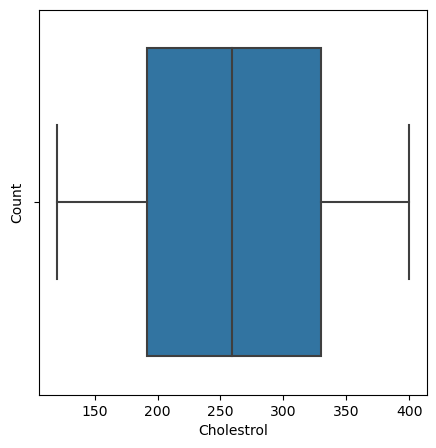

In [18]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, x='Cholesterol')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

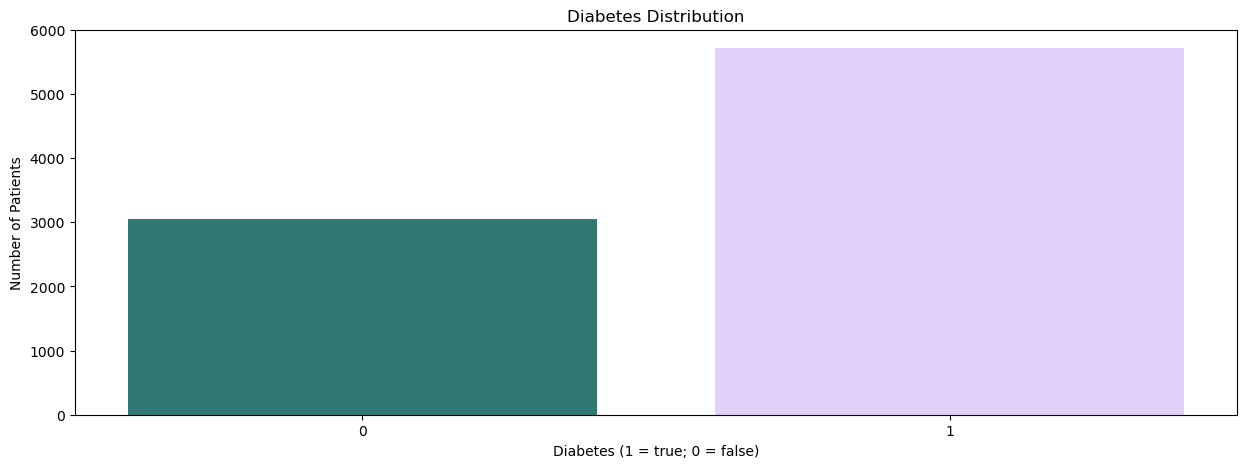

In [19]:
Diabetes_count = data['Diabetes'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Diabetes_count.index, Diabetes_count.values, color=["#E2D1F9", "#317773"])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(Diabetes_count.index)
plt.show()

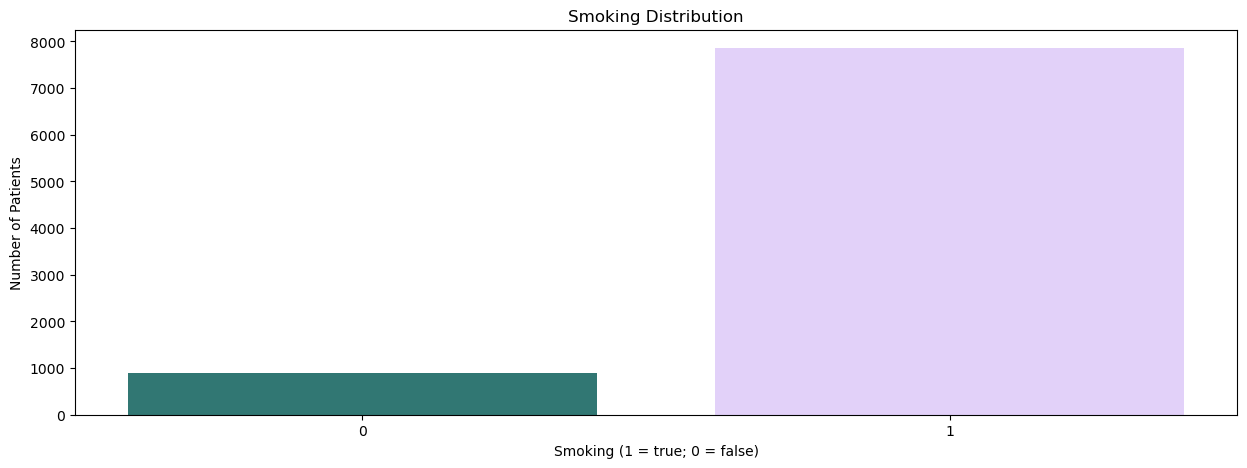

In [20]:
Smoking_count = data['Smoking'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Smoking_count.index, Smoking_count.values, color=["#E2D1F9", "#317773"])
plt.title('Smoking Distribution')
plt.xlabel('Smoking (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(Smoking_count.index)
plt.show()

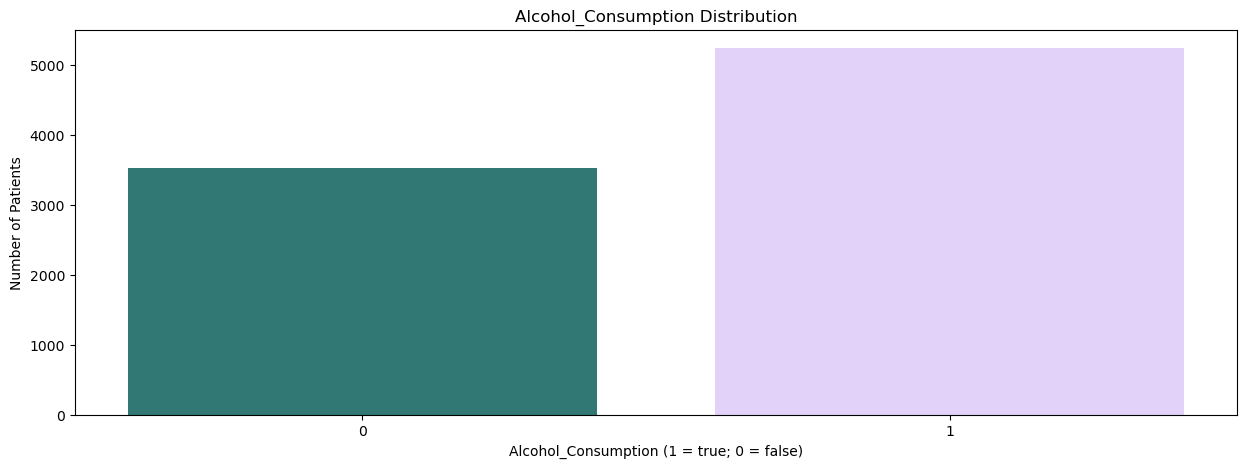

In [21]:
Alcohol_Consumption_count = data['Alcohol_Consumption'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Alcohol_Consumption_count.index, Alcohol_Consumption_count.values, color=["#E2D1F9", "#317773"])
plt.title('Alcohol_Consumption Distribution')
plt.xlabel('Alcohol_Consumption (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(Alcohol_Consumption_count.index)
plt.show()

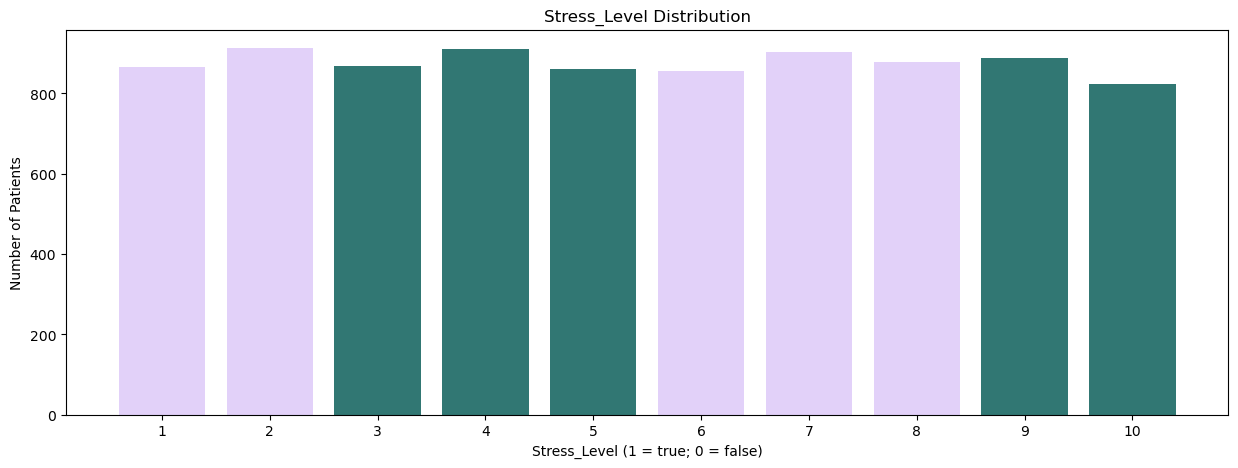

In [22]:
Stress_Level_count = data['Stress_Level'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(Stress_Level_count.index, Stress_Level_count.values, color=["#E2D1F9", "#317773"])
plt.title('Stress_Level Distribution')
plt.xlabel('Stress_Level (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(Stress_Level_count.index)
plt.show()

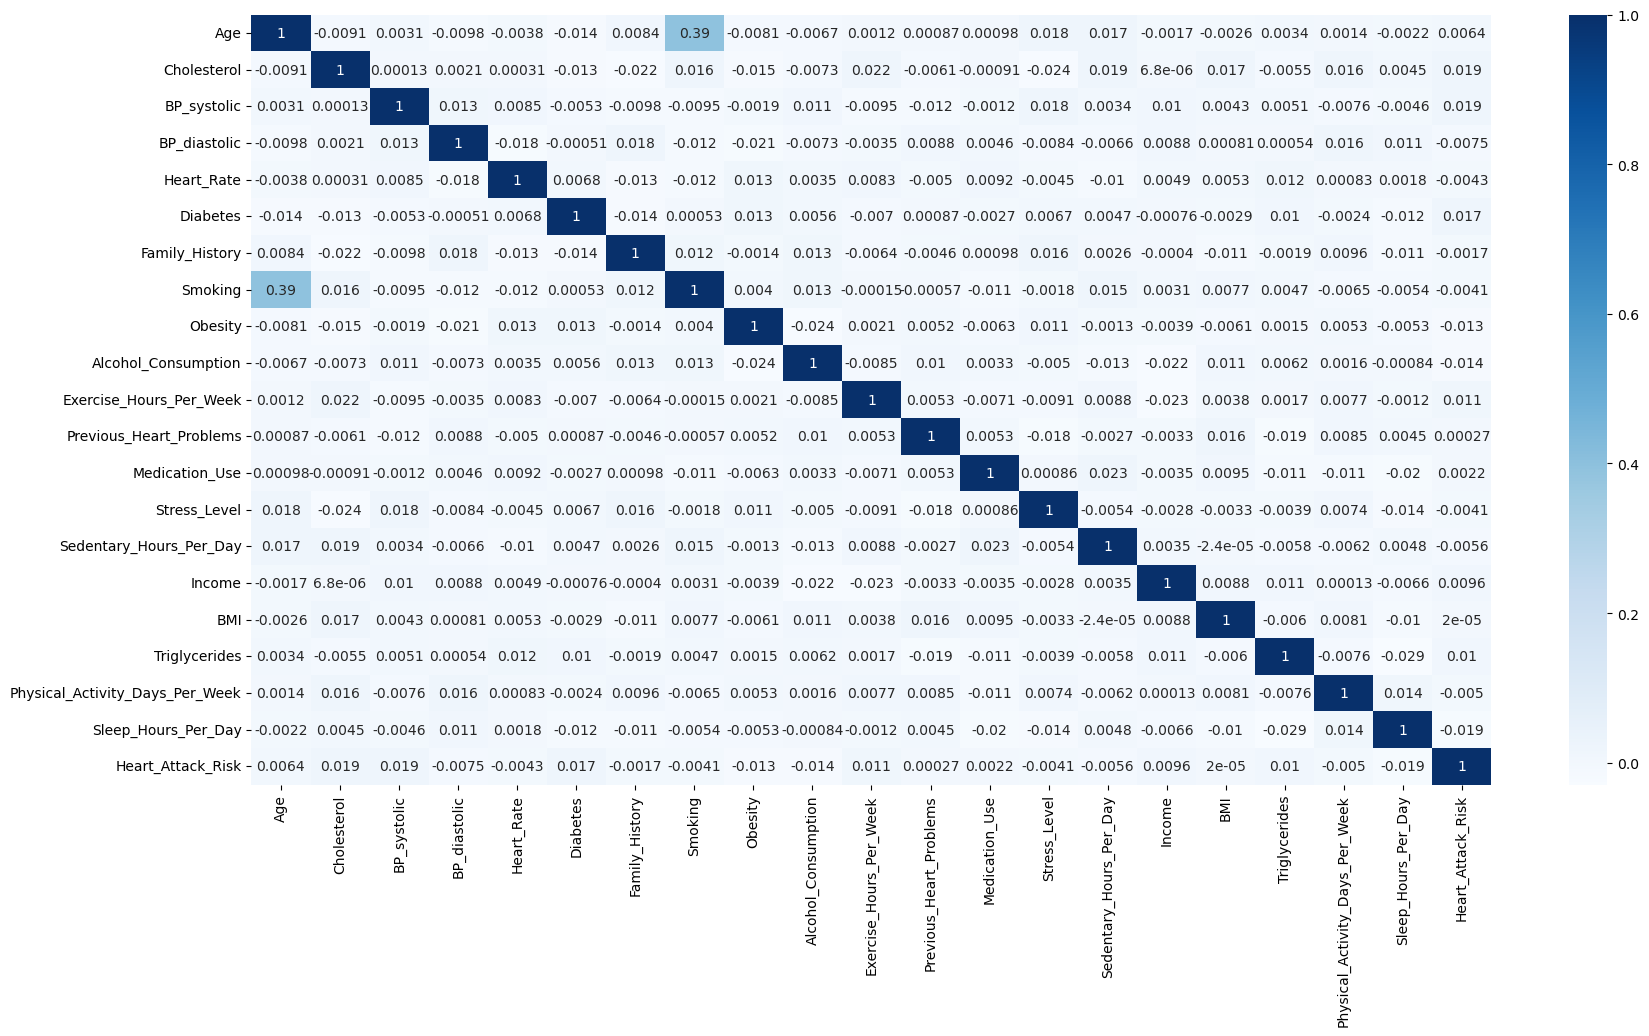

In [23]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [24]:
def outlier_thresholds(data, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = data[col_name].quantile(low_quantile)
    Q3 = data[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [25]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [26]:
for col in num_cols:
    print(col, check_outlier(data, col))

Age False
Cholesterol False
BP_systolic False
BP_diastolic False
Heart_Rate False
Exercise_Hours_Per_Week False
Sedentary_Hours_Per_Day False
Income False
BMI False
Triglycerides False


In [27]:
data['Age_CAT'] = pd.cut(x=data['Age'],
                            bins=[20, 40, 60, data['Age'].max()],
                            labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])

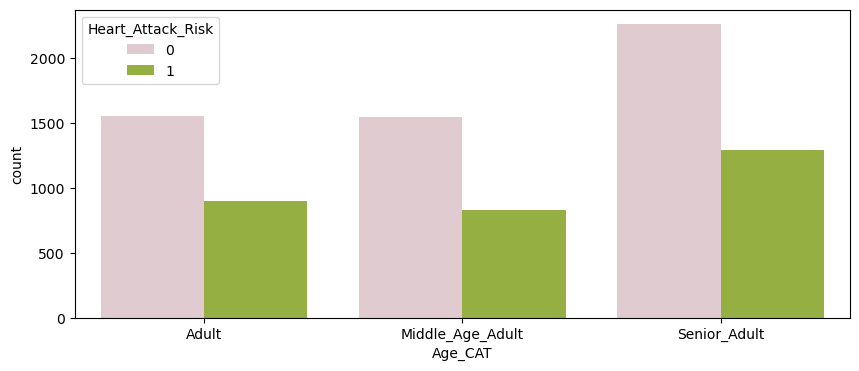

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Age_CAT',
              hue='Heart_Attack_Risk',
              order=["Adult", "Middle_Age_Adult", "Senior_Adult"],
              palette=["#E3C9CEFF", "#9FC131FF"])
plt.show()

Making the data ready for Modeling

In [29]:
cat_cols.append('Age_CAT')
cat_cols

['Sex',
 'Diabetes',
 'Family_History',
 'Smoking',
 'Obesity',
 'Alcohol_Consumption',
 'Diet',
 'Previous_Heart_Problems',
 'Medication_Use',
 'Stress_Level',
 'Physical_Activity_Days_Per_Week',
 'Sleep_Hours_Per_Day',
 'Country',
 'Continent',
 'Hemisphere',
 'Heart_Attack_Risk',
 'Age_CAT']

In [30]:
num_cols

['Age',
 'Cholesterol',
 'BP_systolic',
 'BP_diastolic',
 'Heart_Rate',
 'Exercise_Hours_Per_Week',
 'Sedentary_Hours_Per_Day',
 'Income',
 'BMI',
 'Triglycerides']

In [31]:
data.columns


Index(['Age', 'Sex', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart_Rate', 'Diabetes', 'Family_History', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week', 'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level', 'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides', 'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 'Country', 'Continent', 'Hemisphere', 'Heart_Attack_Risk', 'Age_CAT'], dtype='object')

In [32]:
df2 = data

df2 = df2[['Age', 'Sex', 'Cholesterol','BP_systolic', 'BP_diastolic',
         'Heart_Rate', 'Diabetes','Family_History', 'Smoking', 'Obesity',
         'Alcohol_Consumption','Exercise_Hours_Per_Week', 'Diet',
         'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level', 
         'Sedentary_Hours_Per_Day', 'Income','BMI', 'Triglycerides', 
         'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 
#         'Country', 'Continent', 'Hemisphere',
       'Heart_Attack_Risk']]

In [33]:
df3 = df2.select_dtypes(include=['object'])
le = LabelEncoder()
label_encoder = {}
for column in df3:
    label_encoder[column] = le
    df3[column] = label_encoder[column].fit_transform(df2[column])

df4 = pd.read_csv('D:\\IntrainTech\\heart_attack_prediction_dataset.csv')

df4 = df4[['Sex', 'Diet']]

result = pd.concat([df4, df3], axis=1)

df2 = df2.drop(['Sex', 'Diet'], axis=1)

df2 = pd.concat([df2, df3], axis=1)

df2 = df2.drop('Income', axis=1)



X = df2[['Age', 'Cholesterol', 'BP_systolic', 'BP_diastolic', 'Heart_Rate',
       'Diabetes', 'Family_History', 'Smoking', 'Obesity',
       'Alcohol_Consumption', 'Exercise_Hours_Per_Week',
       'Previous_Heart_Problems', 'Medication_Use',
        'BMI', 'Triglycerides',
       'Sleep_Hours_Per_Day',
       'Sex', 'Diet']]
y = df2[['Heart_Attack_Risk']]


In [34]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y_resample, test_size=0.2, random_state=42)


In [37]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


In [38]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (8998, 18)
Shape of x_test is (2250, 18)
Shape of y_train is (8998,)
Shape of y_test is (2250,)


In [39]:
models = [('Logistic Regression', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
          ('Naive Bayes',GaussianNB()),
          ('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=10)),
          ('Support Vector Machine',SVC(kernel='rbf', C=2)),
          ('Decision Tree', DecisionTreeClassifier(random_state=17)),
          ('Random Forest', RandomForestClassifier(random_state=17)),
          ('Extreme Gradient Boost', XGBClassifier(random_state=17, eval_metric='logloss')),
          ('Light Gradient Boost', LGBMClassifier(random_state=17, verbose=-1))]


In [40]:
aqrc=[]
mdl=[]
for name, model in models:
    m=model.fit(X_train,y_train)
    p=model.predict(X_test)
    cf=confusion_matrix(y_test, p)
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
    mdl.append(name)
    aqrc.append(round(cv_results["test_accuracy"].mean()*100, 4))
    print(f'########## {name} ##########')
    print(f'Confusion Matrix:\n{cf}\n')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean()*100, 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1"].mean(), 4)}\n\n')

########## Logistic Regression ##########
Confusion Matrix:
[[679 441]
 [434 696]]

Accuracy: 64.1789
Auc: 0.4995
Recall: 0.0
Precision: 0.0
F1: 0.0


########## Naive Bayes ##########
Confusion Matrix:
[[736 384]
 [467 663]]

Accuracy: 64.1789
Auc: 0.4981
Recall: 0.0
Precision: 0.0
F1: 0.0


########## K-Nearest Neighbors ##########
Confusion Matrix:
[[743 377]
 [463 667]]

Accuracy: 61.8969
Auc: 0.5117
Recall: 0.122
Precision: 0.3967
F1: 0.1864


########## Support Vector Machine ##########
Confusion Matrix:
[[794 326]
 [467 663]]

Accuracy: 64.1789
Auc: 0.4905
Recall: 0.0
Precision: 0.0
F1: 0.0


########## Decision Tree ##########
Confusion Matrix:
[[652 468]
 [457 673]]

Accuracy: 53.9655
Auc: 0.5035
Recall: 0.3759
Precision: 0.3625
F1: 0.3689


########## Random Forest ##########
Confusion Matrix:
[[827 293]
 [442 688]]

Accuracy: 63.6197
Auc: 0.5081
Recall: 0.0299
Precision: 0.4014
F1: 0.0556


########## Extreme Gradient Boost ##########
Confusion Matrix:
[[741 379]
 [392 738]]

In [41]:
df = pd.DataFrame(list(zip(mdl, aqrc)),columns =['Model', 'Accuracy'])

In [42]:
df

,Model,Accuracy
0,Logistic Regression,64.18
1,Naive Bayes,64.18
2,K-Nearest Neighbors,61.90
3,Support Vector Machine,64.18
4,Decision Tree,53.97
5,Random Forest,63.62
6,Extreme Gradient Boost,59.35
7,Light Gradient Boost,62.60
8,CatBoost,62.99


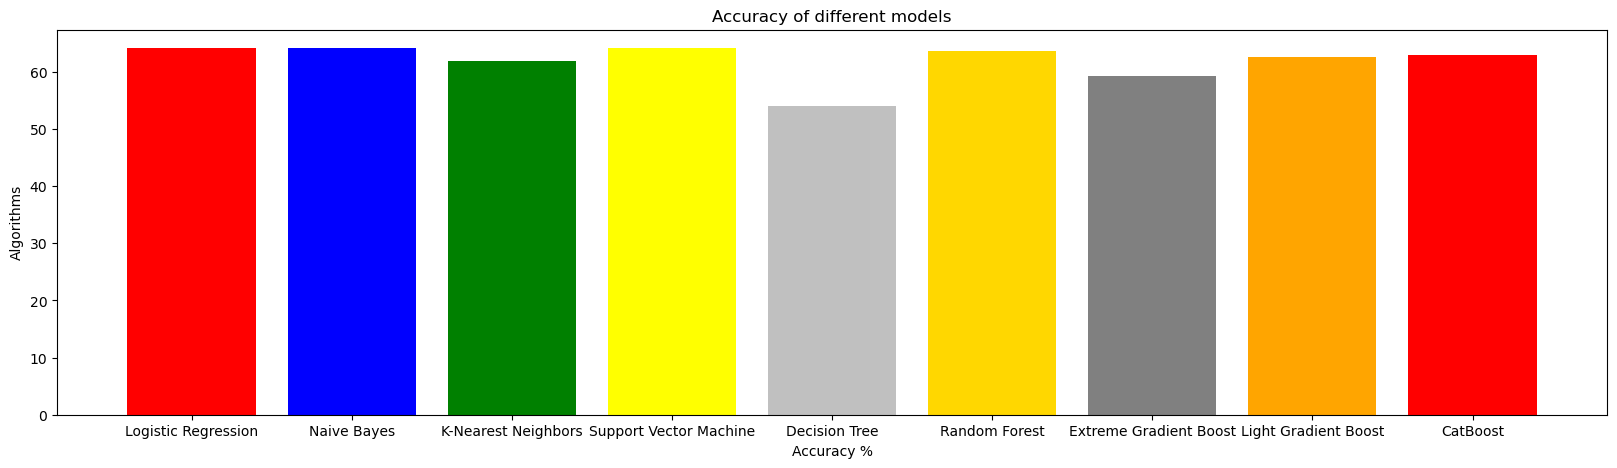

In [43]:
colors = ['red','blue','green','yellow','silver','gold','grey','orange']
plt.figure(figsize=(20,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(df['Model'],df['Accuracy'],color = colors)
plt.show()